In [1]:
library(Ragas)
library(cowplot)
library(RColorBrewer)


Loading required package: Seurat

Attaching SeuratObject

Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

Registered S3 methods overwritten by 'car':
  method     

In [2]:
load('colors.RData')

## Load sorted CD4 naive/NCM object

In [3]:
cd4.ncm.clean <- readRDS('sorted.cd4.ncm.rds')

In [4]:
names(cd4.ncm.clean[[]])

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "Cohort"                     
 [5] "Gender"                      "Age"                        
 [7] "Ethnicity_Race"              "Nephritis_Class"            
 [9] "Batch"                       "Group"                      
[11] "Activation"                  "Subject_ID"                 
[13] "Sample_ID"                   "SLEDAI"                     
[15] "MDG"                         "percent.mt"                 
[17] "doublet_score"               "theshold"                   
[19] "predicted_doublet"           "predicted.celltype.l3"      
[21] "predicted.celltype.l3.score" "mapping.score"              
[23] "Dataset"                     "Group_LN"                   
[25] "SLEDAI.num"                  "Group_SLEDAI"               
[27] "percent.mt.cat"              "RNA_snn_res.0.5"            
[29] "seurat_clusters"             "RNA_snn_res.0.4"

In [5]:
# Create Pi object
cd4.ncm.pi <- CreatePostIntegrationObject(object = cd4.ncm.clean)

Post-integration object created



In [6]:
# FindMarkers
cd4.ncm.pi <- RunFindAllMarkers(object = cd4.ncm.pi, idents = "seurat_clusters", future.workers = 8)

Running multiple workers...

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [7]:
# Expression Frequency
cd4.ncm.pi <- CalculateExpFreqs(cd4.ncm.pi,ident = "seurat_clusters")

Calculating expression frequencies for seurat_clusters: 0

Calculating expression frequencies for seurat_clusters: 1

Calculating expression frequencies for seurat_clusters: 2

Calculating expression frequencies for seurat_clusters: 3

Calculating expression frequencies for seurat_clusters: 4

Calculating expression frequencies for seurat_clusters: 5

Done!



In [8]:
cd4.ncm.pi

An object of class Pi 
6 fields in the object: seurat.obj, exp.freq, markers, ds, cell.prop, parent.meta.data.
The following fields have been processed:
	seurat.obj: A Seurat object of 26053 features and 106985 cells.
		1 assay: RNA, and 3 reductions: pca, harmony, umap
	exp.freq: A list of numeric matrices containing per gene expression frequencies
		1 analysis run: 
		  ExpFreq|seurat_clusters|cutoff=0
	markers: A list of data frames containing marker results.
		1 analysis run: 
		  Markers|seurat_clusters|AllMarkers|test.use=wilcox
Metadata from the parent object provided? No 
Subclusters integrated? No

## Figure 2a

Centering and scaling data matrix



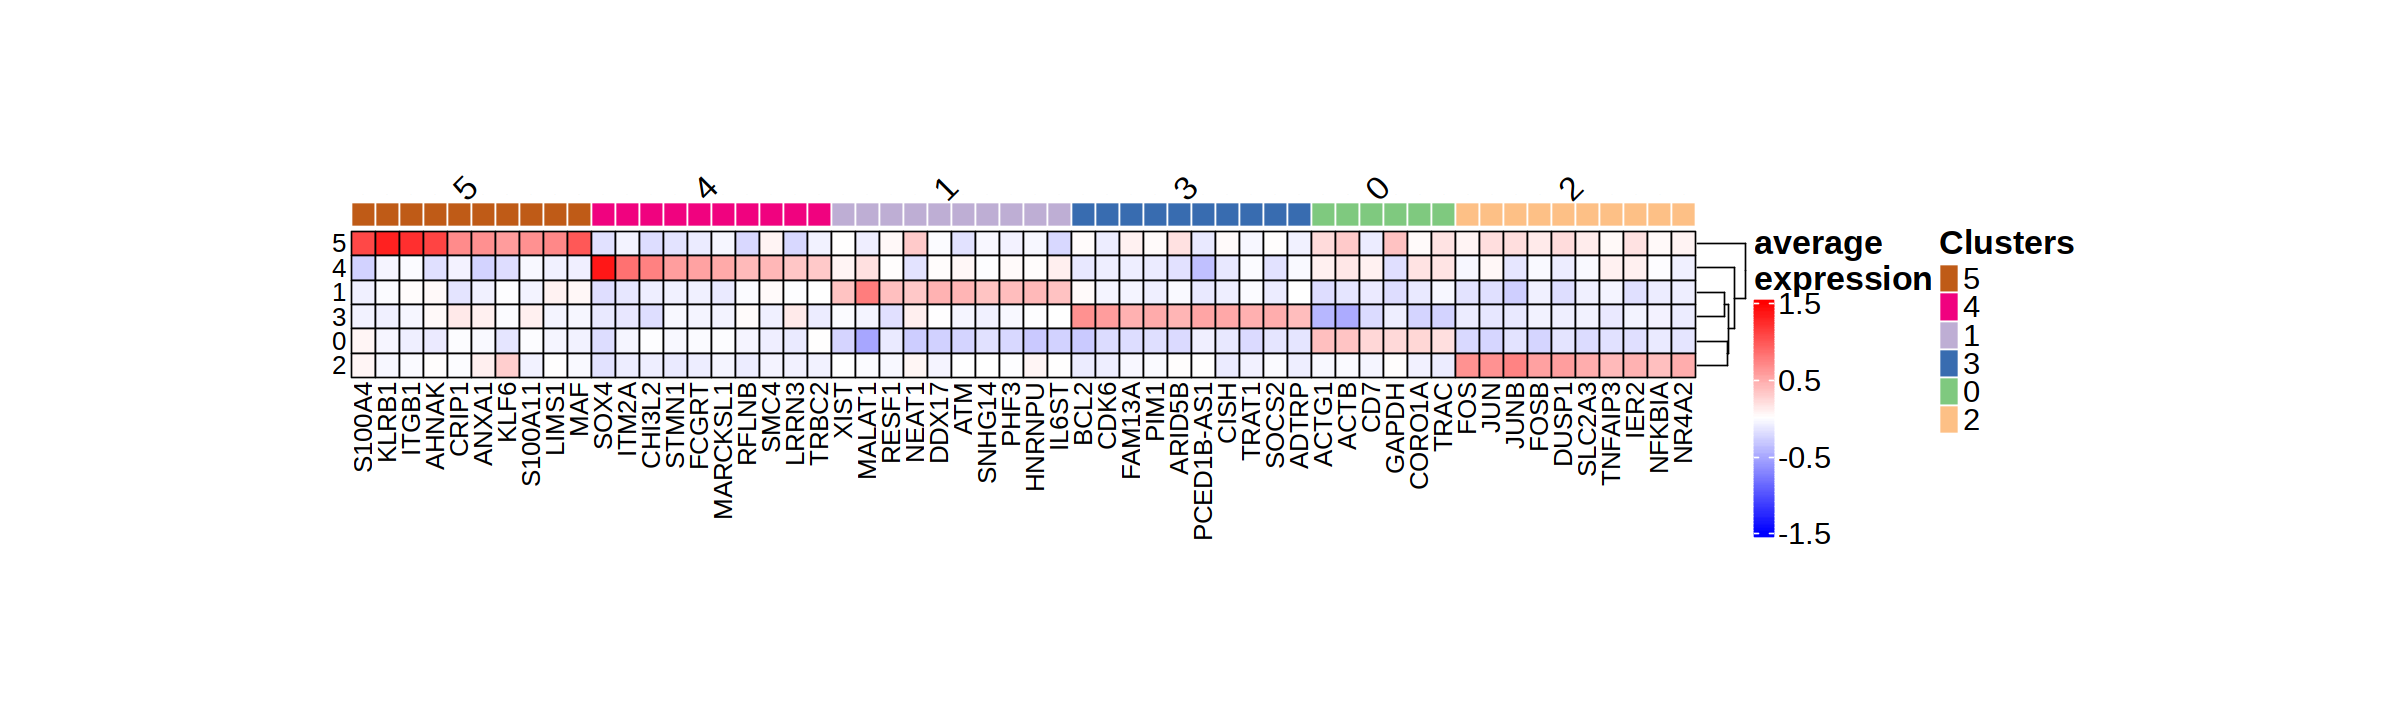

In [9]:
options(repr.plot.width = 20, repr.plot.height = 6)
p1 <- RunMatrixPlot(cd4.ncm.pi, markers.key = "Markers|seurat_clusters|AllMarkers|test.use=wilcox", top.n = 10, 
                    column.fontsize =15, 
                    row.fontsize = 15,
                    column.anno.cols = cols.ncm.clus,
                    column.anno.name.fontsize = 20,
                    column.anno.name.rot = 45,
                    heatmap.cols = NULL,
                    legend.label.fontsize = 18,
                    legend.title.fontsize = 20,
                    heatmap.width = 30, heatmap.height = 8)
p1

## Figure 2b

In [10]:
t.ncm.markers <- list("NAI-FOS" = c("FOS", "JUN", "IER2"), 
                      "NAI-SOX4" = c("SOX4", "ITM2A", "CHI3L2"), 
                      "NAI-IL6ST" = c("IL6ST", "ATM", "RESF1"), 
                      "NAI-BCL2" = c("BCL2", "CDK6"), 
                      "NAI-ACTB" = c("ACTB", "ACTG1"), 
                      "TCM" = c("S100A4", "KLRB1", "ITGB1", "ANXA1"))

In [11]:
cols.column.anno <- list("Cluster" = cols.ncm.clus)
row.anno <- c(brewer.pal(n = length(t.ncm.markers), 'Dark2'))
names(row.anno) <- names(t.ncm.markers)

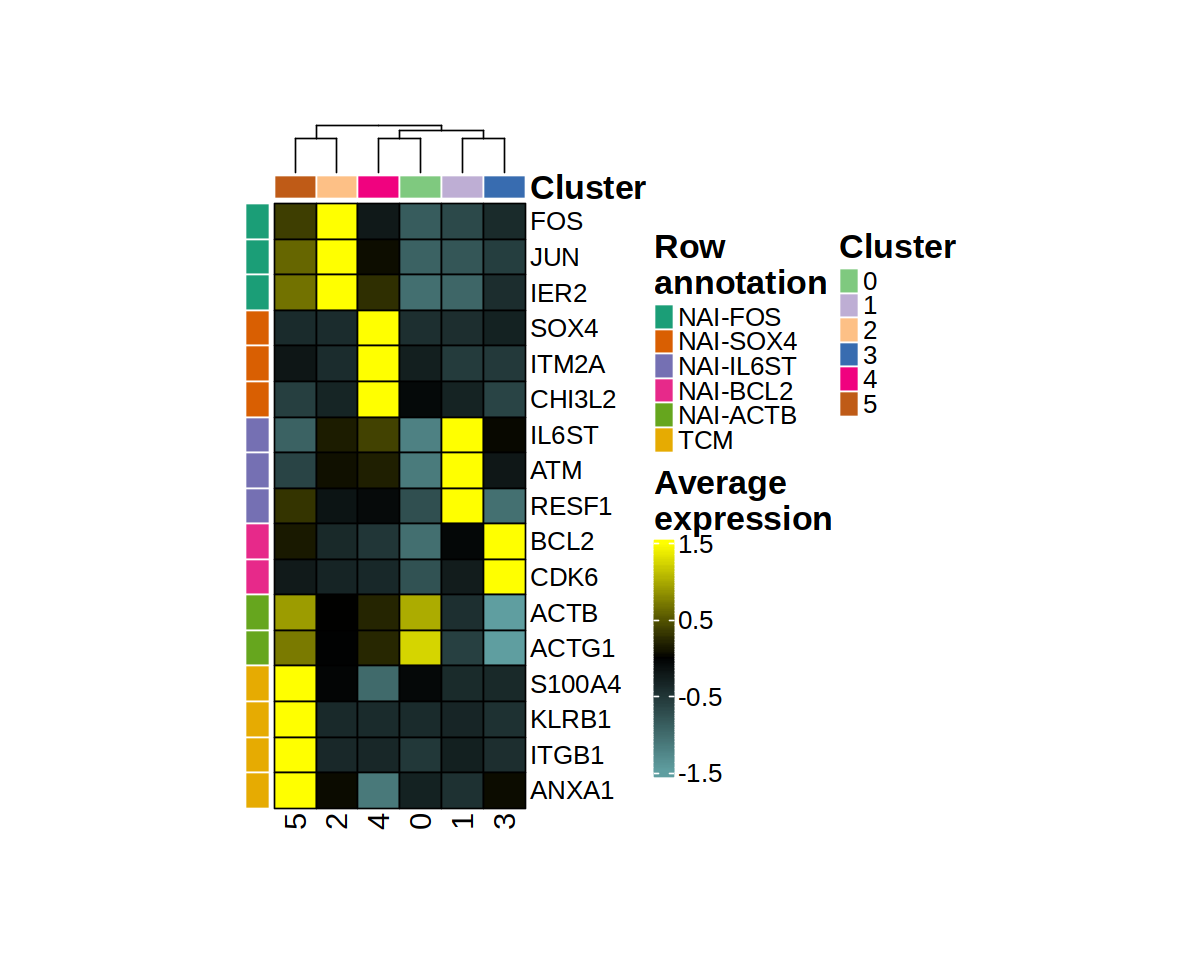

In [12]:
p1 <- RunSummarizedHeatmap(object = cd4.ncm.pi, 
                           max.exp = 1.5, min.exp = (-1.5),
                           ident = "seurat_clusters", 
                           features = t.ncm.markers, 
                           column.annotation.cols = cols.column.anno,
                           row.annotation.cols = row.anno,
                           heatmap.width = 8, heatmap.height = 15, 
                           clust.column = TRUE, 
                           clust.row = FALSE,
                           row.fontsize = 15,
                           column.fontsize = 18,
                           legend.label.fontsize = 15,
                           legend.title.fontsize = 20,
                           annotation.name.fontsize = 20)

options(repr.plot.width = 10, repr.plot.height = 8)
p1

## Figure 2c

In [13]:
pbmc1.cd4.nai <- readRDS('pbmc1.cd4.nai.rds')

In [14]:
t.ncm.markers <- list("NAI-FOS" = c("FOS", "JUN", "IER2"), 
                      "NAI-SOX4" = c("SOX4", "ITM2A", "CHI3L2"), 
                      "NAI-IL6ST" = c("IL6ST", "ATM", "RESF1"), 
                      "NAI-BCL2" = c("BCL2", "CDK6"), 
                      "NAI-ACTB" = c("ACTB", "ACTG1"), 
                      "TCM" = c("S100A4", "KLRB1", "ITGB1", "ANXA1"))

In [15]:
cols.column.anno <- list("Cluster" = cols.nai.pbmc1.clus)
row.anno <- c(brewer.pal(n = length(t.ncm.markers), 'Dark2'))
names(row.anno) <- names(t.ncm.markers)

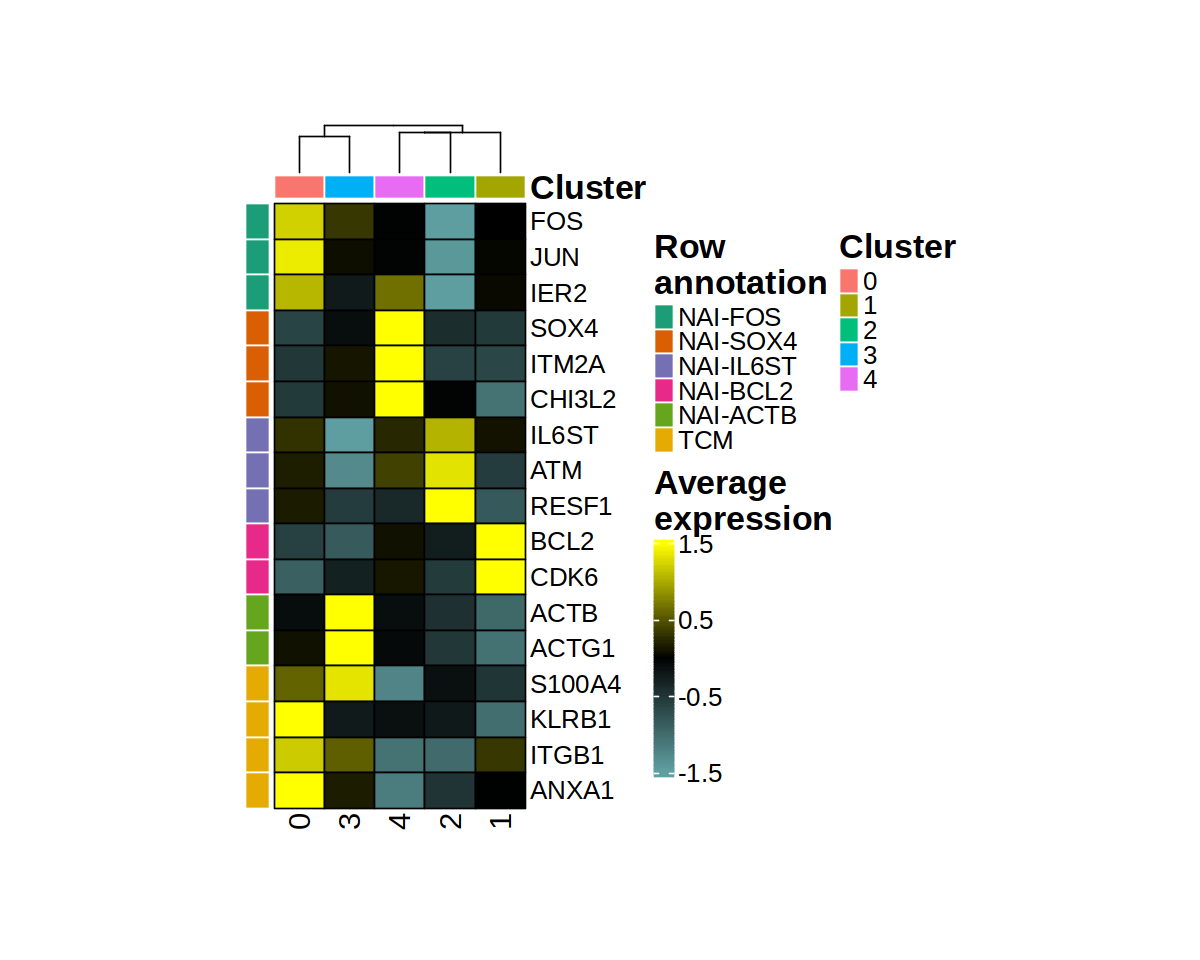

In [16]:
p1 <- RunSummarizedHeatmap(object = pbmc1.cd4.nai, 
                           max.exp = 1.5, min.exp = (-1.5),
                           ident = "seurat_clusters", 
                           features = t.ncm.markers, 
                           column.annotation.cols = cols.column.anno,
                           row.annotation.cols = row.anno,
                           heatmap.width = 8, heatmap.height = 15, 
                           clust.column = TRUE, 
                           clust.row = FALSE,
                           row.fontsize = 15,
                           column.fontsize = 18,
                           legend.label.fontsize = 15,
                           legend.title.fontsize = 20,
                           annotation.name.fontsize = 20)

options(repr.plot.width = 10, repr.plot.height = 8)
p1

## Figure 2d

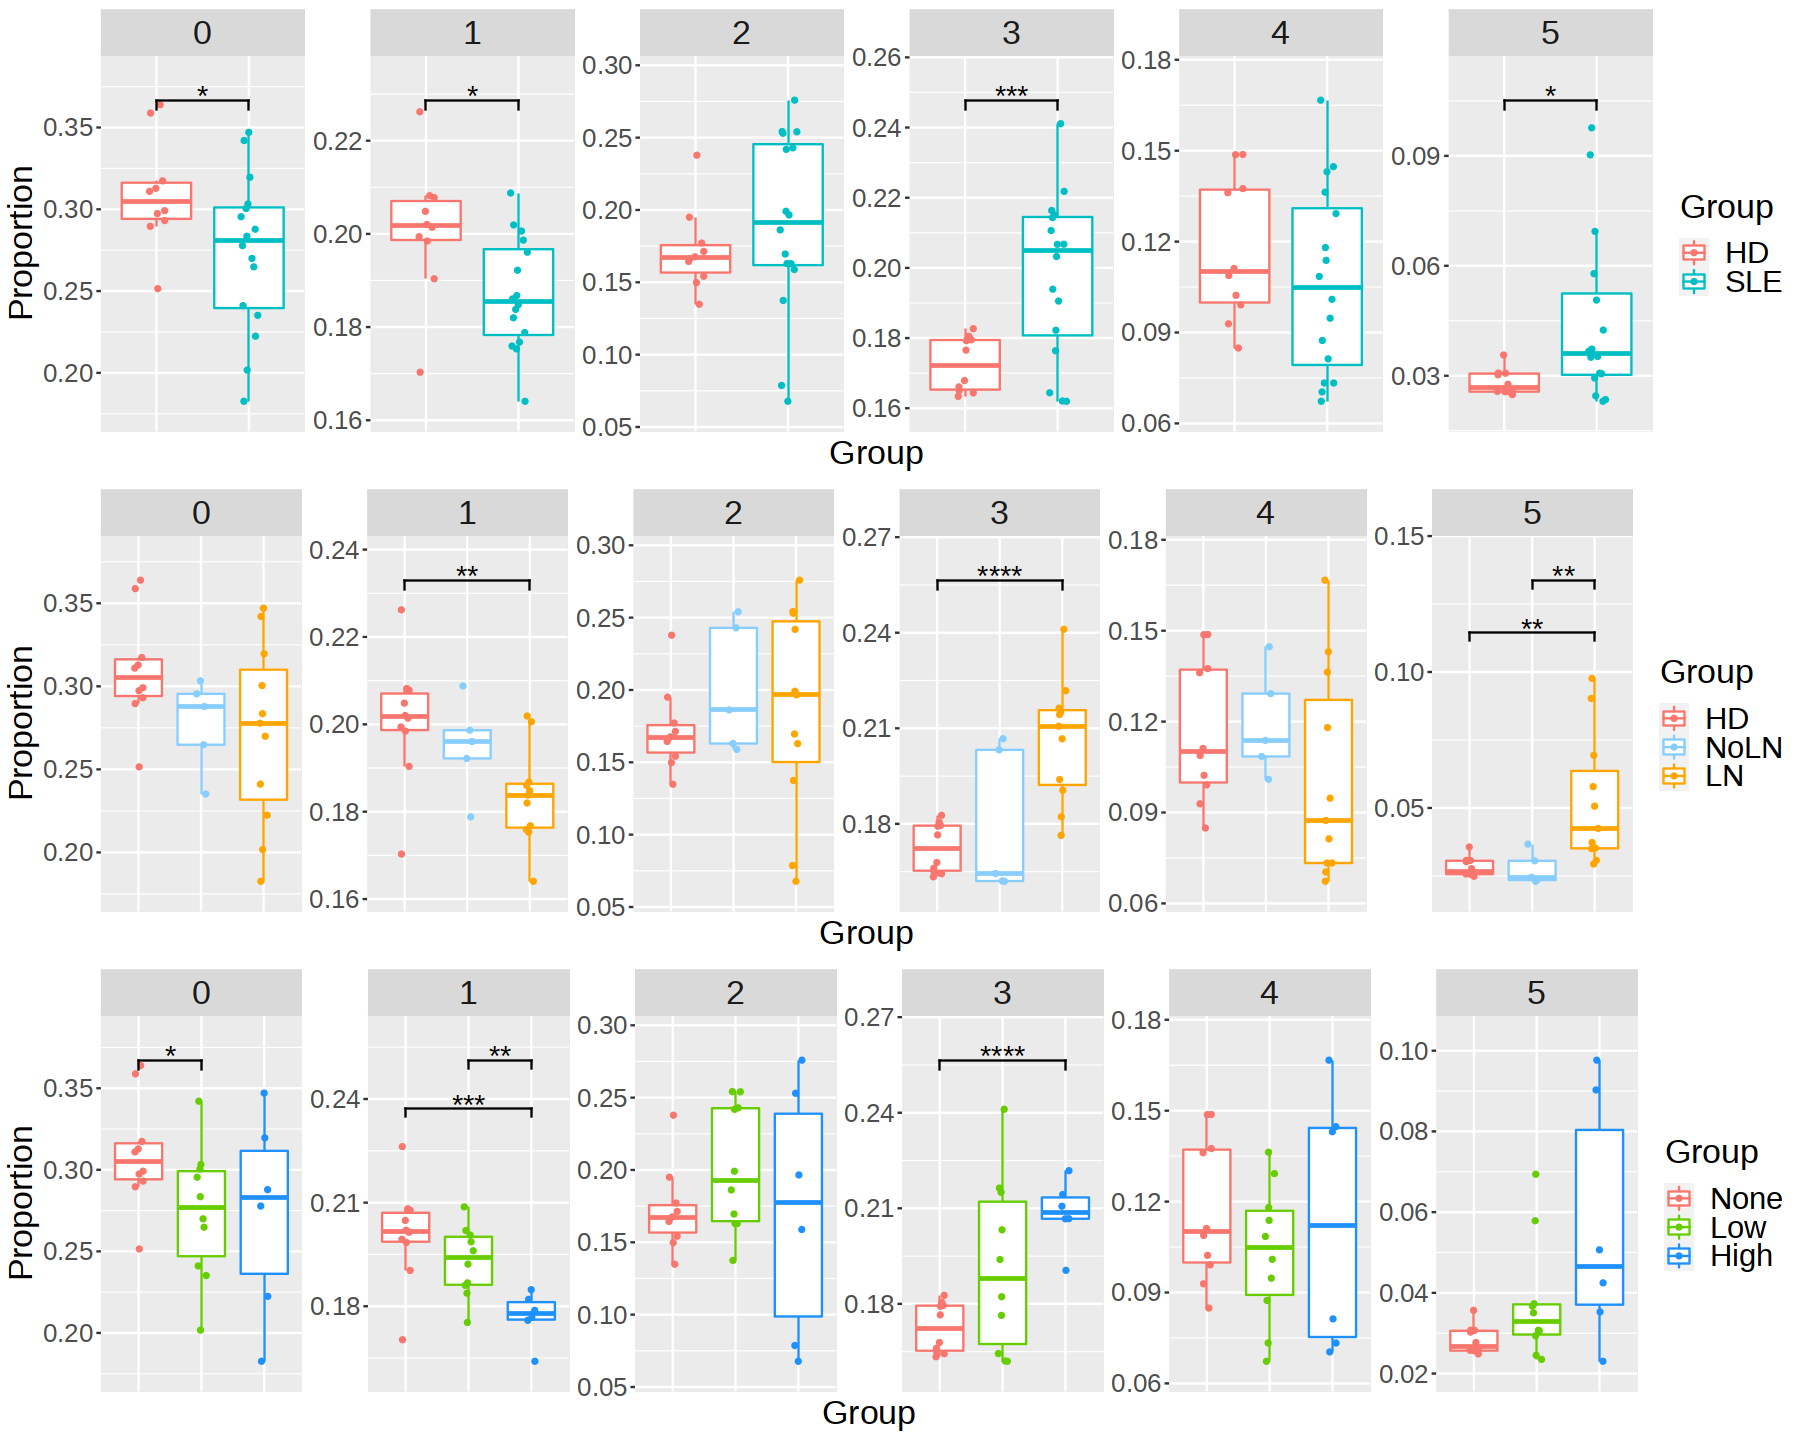

In [17]:
options(repr.plot.width = 15, repr.plot.height = 4)

out1 <- RunProportionPlot(cd4.ncm.pi, ident = 'seurat_clusters',
                          group.by = "Group",
                          method = "unpooled",
                          unpool.by = "Sample_ID",
                          use.parent.as.ref = FALSE,
                          return.value = 'ggplot',
                          unpool.ncol = 6, group.colors = cols.group,
                          title.text.size = 20,
                          axis.title.size = 20,
                          axis.text.size = 15,
                          legend.title.size = 20,
                          legend.text.size = 18
)

out2 <- RunProportionPlot(cd4.ncm.pi, ident = 'seurat_clusters',
                          group.by = "Group_LN",
                          method = "unpooled",
                          unpool.by = "Sample_ID",
                          use.parent.as.ref = FALSE,
                          return.value = 'ggplot',
                          unpool.ncol = 6, group.colors = cols.ln,
                          title.text.size = 20,
                          axis.title.size = 20,
                          axis.text.size = 15,
                          legend.title.size = 20,
                          legend.text.size = 18
)

out3 <- RunProportionPlot(cd4.ncm.pi, ident = 'seurat_clusters',
                          group.by = "Group_SLEDAI",
                          method = "unpooled",
                          unpool.by = "Sample_ID",
                          use.parent.as.ref = FALSE,
                          return.value = 'ggplot',
                          unpool.ncol = 6, group.colors = cols.sledai,
                          title.text.size = 20,
                          axis.title.size = 20,
                          axis.text.size = 15,
                          legend.title.size = 20,
                          legend.text.size = 18
)

p1 <- plot_grid(out1, out2, out3, nrow = 3)
options(repr.plot.width = 15, repr.plot.height = 12)
p1